In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects
from matplotlib.colors import LinearSegmentedColormap
import os

In [2]:
# choose basa or GG
database = 'basa' # 'basa' or 'GG'

if database == 'basa':
    results = 'results_basa'
    data_species = 'GAM_species/species_fit_140_0.01.pkl'
    windows = [(0, 40), (20, 60), (40, 80), (60, 100), (80, 120), (100, 140)]
    windows = [(0, 50), (51, 84), (85, 140)]
    
if database == 'GG':
    results = 'results_GG'
    data_species = '../data_GG/GAM/species_fit_301_0.01.pkl'
    windows = [(0, 100), (50, 150), (100, 200), (150, 250), (200, 300)]
    windows = [(0, 56), (57, 149), (150, 249), (250, 300)]

data_path = f'./{results}/transfer_entropies'

species_index = pd.read_pickle(f'{results}/species_index.pkl')
species_index_T = pd.Series(species_index)
species_index_T = pd.Series(species_index_T.index, index = species_index_T.values)
species_index_T = species_index_T.to_dict()

if database == 'basa':
    # ONLY NON AQUATIC SPECIES v2
    non_aq_species = 'Abies,Pinus,Juniperus,Taxus,Betula,Corylus,Alnus,Carpinus,Salix,Ulmus,Populus,Acer,Fraxinus,Fagus,Tilia,Juglans,Castanea,Quercus caducifolio,Quercus perennifolio,Pistacia,Rhamnus,Phillyrea,Buxus,Sambucus,Viburnum,Sanguisorba,Tamarix,Thymelaeaceae,Ephedra distachya,Ephedra fragilis,Ericaceae,Hereda helix,Ilex aquifolium,Viscum album,Lonicera,Vitis,Oleaceae,Myrtus,Olea,Poaceae,Lygeum spartum,Artemisia,Cichorioideae,Asteroideae,Cardueae,Rubiaceae,Centaurea,Chenopodiaceae,Caryophyllaceae,Plantago,Brassicaceae,Gentiana,Saxifragaceae,Fabaceae,Genista,Lotus type,Trifolium type,Rosaceae,Ribes,Potentilla,Boraginaceae,Sedum,Helianthemum,Linum,Corydalis,Lamiaceae,Urticaceae,Rumex,Plumbaginaceae,Berberidaceae,Euphorbiaceae,Primulaceae,Scrophulariaceae,Papaver,Geraniaceae,Campanulaceae,Dipsacaceae,Malvaceae,Violaceae,Convolvulaceae,Asphodelus,Liliaceae,Iridaceae,Erodium,Cytisus,Crassulaceae,Lycium,Ranunculaceae,Cistaceae,Orobanchaceae,Galium,Apiaceae,Valerianaceae,Cerealia type,Polygonaceae,Pinguicula,Droseraceae,Cannabis ,Epilobium,Aristolochia,Ranunculus'.split(',')
    # non aquatic species v3
    non_aq_species = 'Abies,Pinus,Juniperus,Taxus,Betula,Corylus,Alnus,Carpinus,Salix,Ulmus,Populus,Acer,Fraxinus,Fagus,Tilia,Juglans,Castanea,Quercus caducifolio,Quercus perennifolio,Pistacia,Rhamnus,Phillyrea,Buxus,Sambucus,Viburnum,Sanguisorba,Tamarix,Thymelaeaceae,Ephedra distachya,Ephedra fragilis,Ericaceae,Hereda helix,Ilex aquifolium,Viscum album,Lonicera,Vitis,Oleaceae,Myrtus,Olea,Poaceae,Lygeum spartum,Artemisia,Cichorioideae,Asteroideae,Cardueae,Rubiaceae,Centaurea,Chenopodiaceae,Caryophyllaceae,Plantago,Brassicaceae,Saxifragaceae,Fabaceae,Genista,Lotus type,Trifolium type,Rosaceae,Ribes,Boraginaceae,Sedum,Helianthemum,Lamiaceae,Urticaceae,Rumex,Berberidaceae,Euphorbiaceae,Primulaceae,Scrophulariaceae,Papaver,Campanulaceae,Convolvulaceae,Liliaceae,Iridaceae,Crassulaceae,Ranunculaceae,Cistaceae,Galium,Apiaceae,Valerianaceae,Cerealia type,Polygonaceae,Ranunculus'.split(',')
    
    species_index_non_aq = {k: v for k, v in species_index.items() if k in set(non_aq_species)}
    species_index_T_non_aq = {v: k for k, v in species_index_non_aq.items()}

if database == 'GG':
    # ONLY NON AQUATIC SPECIES
    non_aq_species = 'Alchemilla,Chenopodiaceae,Artemisia,Cichoroideae,Asteroideae,Carduus,Asteraceae,Vernonia,Polygonum,Tribulus,Galium,Brassicaceae,Caryophylaceae,Swertia,Senecio,Erica,Hypericum,Anthospermum,Cerastium,Apiaceae,Podocarpus,Euclea,Hagenia,Juniperus,Myrsine,Rapanea,Rosa,Schefflera,Brucea,Sapotaceae,Iridaceae,Anthyllis,Maytenus,Buxus,Psydrax,Celastraceae,Celtis,Dodonaea,Ekebergia,Ephedra,Clematis,Myrica,Hypoestes,Ziziphus,Acanthus,Allophylus,Acacia,Combretum,Commiphora,Cussonia,Dobera,Lannea,Macaranga,Olea,Jasminum,Rhus,Securinega,Teclea,Zanthoxylum,Cassia,Capparidaceae,Acalypha,Euphorbia,Euphorbiacea,Phyllantus,Tamarindus,Alchornea,Aloe,Asphodellus,Leguminosae,Rubiaceae,Blepharis,Justicia,Heliotropium,Kohautia,Indigofera,Lamiaceae,Cerealia,Plantago,Planceolata,Poaceae,Rumex,Solanum,Urticaceae,Ricinus,Saussurea'.split(',')
    # species_index_non_aq = species_index
    # species_index_T_non_aq = species_index_T
    species_index_non_aq = {k: v for k, v in species_index.items() if k in set(non_aq_species)}
    species_index_T_non_aq = {v: k for k, v in species_index_non_aq.items()}



abundances = pd.read_pickle(data_species)
for species in abundances.columns:
    abundances[species]['y'][abundances[species]['y'] < .001] = 0

In [3]:
# read granger causalities
granger_causalities = []
granger_causalities_p_values = []
for idx,(start,end) in enumerate(windows):
    granger_causality = pd.read_pickle(f'{results}/granger_causalities/original_table_{start}:{end}.pkl')
    granger_causality[granger_causality > 100] = 0
    granger_causality[granger_causality < -100] = 0
    # granger_causality[np.eye(granger_causality.shape[0], dtype=bool)] = np.nan
    granger_causalities.append(granger_causality)

    granger_causality_p_values = pd.read_pickle(f'{results}/granger_causalities/original_table_p_values_{start}:{end}.pkl')
    granger_causality_p_values[np.eye(granger_causality_p_values.shape[0], dtype=bool)] = np.nan
    granger_causalities_p_values.append(granger_causality_p_values)

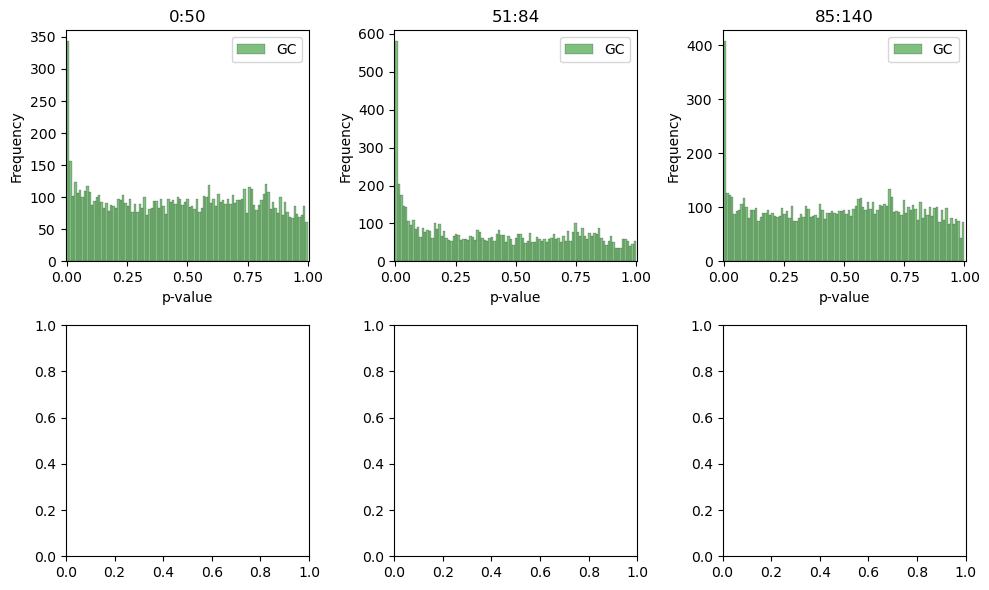

In [4]:
fig,axes = plt.subplots(2,3,figsize=(10, 6))
for idx in range(len(windows)):

    # every link that has a p-value of 1 in GC, put a p-value of 1 also in TE
    granger_causalities_p_values[idx][granger_causalities_p_values[idx] == 1.0] = np.nan
    # p_values_list[idx][granger_causalities_p_values[idx] == 1.0] = np.nan

    ax = axes.flatten()[idx]
    # ax.hist(p_values_list[idx].flatten(), bins = int(51), alpha=0.5, edgecolor='black', linewidth=0.25, color='blue', label='TE')
    granger_causality_pvalues = granger_causalities_p_values[idx].flatten()
    ax.hist(granger_causality_pvalues, bins = int(101), alpha=0.5, edgecolor='black', linewidth=0.25, color='green', label='GC')
    ax.set_xlabel('p-value')
    ax.set_ylabel('Frequency')
    ax.legend()
    (start, end) = windows[idx]
    ax.set_title(f'{start}:{end}')
    ax.set_xlim(-0.005,1.005)
fig.set_tight_layout(True)
# fig.savefig(f'./{results}/TE_vs_GC_p_values.png', dpi=300)

In [5]:
import networkx as nx



# grab the top L edges
# L = 100
graphs = []

for idx,(start,end) in enumerate(windows):
    
    # for the TE p_values (p_values_list) or the gc p_values (granger_causalities_p_values)
    # adjacency = p_values_list[idx]
    adjacency = granger_causalities_p_values[idx]
    # remove na from the numpy array adjacency
    adjacency = np.nan_to_num(adjacency, nan=1.0)
    # ONLY NON AQUATIC SPECIES
    species_list = list(species_index_T_non_aq.keys())

    # adjacency_non_aq = adjacency[np.ix_(species_list, species_list)]
    # cut_value = np.sort(adjacency_non_aq.flatten())[L]

    cut_value = 0.01

    adjacency_pvalued = (adjacency <= cut_value).astype(int)
    adjacency = granger_causalities[idx] * adjacency_pvalued
    
    graph = nx.from_numpy_array(adjacency, create_using=nx.DiGraph, edge_attr='weight')
    # remove all nodes that are not in the non_aq_species list
    graph.remove_nodes_from([node for node in graph.nodes() if species_index_T[node] not in non_aq_species])
    graphs.append(graph)
    print(cut_value, graph.number_of_edges())

# explanation cause it's confusing
# we need to create the graph with the indices of the original species index, so we use the whole adjacency matrix
# however to remove the aquatic nodes and keep 100 links, we count them on the adjacency_non_aq, then create the whole graph, then remove again the aquatic nodes
# this should leave about the 100 links

0.01 161
0.01 252
0.01 155


## Degree distribution

In [6]:
for idx in range(len(windows)):
    out_degree_1 = np.array([graphs[idx].out_degree(n) for n in graphs[idx].nodes() if (abundances[species_index_T_non_aq[n]]['y'][windows[idx][0]:windows[idx][1]].sum() > 0)])
    out_degree_2 = np.array([graphs[idx].out_degree(n) for n in graphs[idx].nodes()])
    print(len(out_degree_2) - len(out_degree_1), ", ", len(out_degree_2))

8 ,  70
9 ,  70
2 ,  70


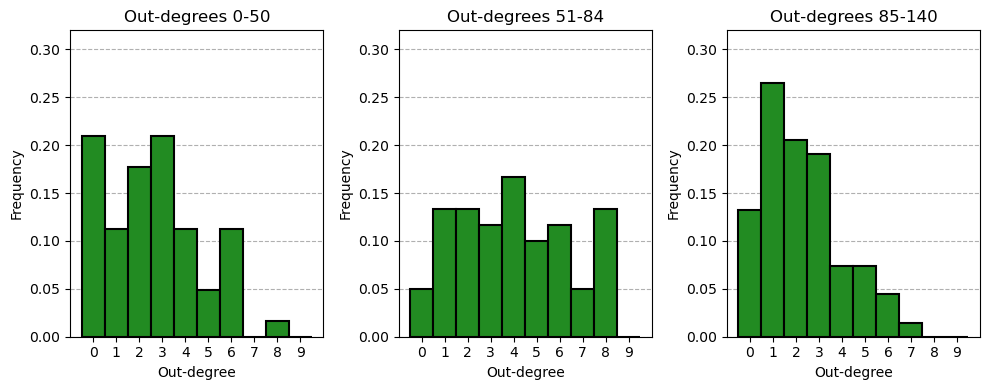

In [7]:
# calculate out-degree distributions

fig, axes = plt.subplots(1, 3, figsize=(10, 4))
degree_distributions = []
for idx, graph in enumerate(graphs):
    # Only take into account nodes with abundance higher than 0

    out_degree = np.array([graphs[idx].out_degree(n) for n in graphs[idx].nodes() if (abundances[species_index_T_non_aq[n]]['y'][windows[idx][0]:windows[idx][1]].sum() > 0)])
    degree_distributions.append(out_degree)
    # plot the degree distributions
    ax = axes.flatten()[idx]
    ax.grid(axis='y', zorder=0, linestyle='--', alpha=1)
    ax.hist(out_degree, histtype='bar',
            bins=np.arange(-0.5, 10.5, 1),
            # bins=np.arange(-0.5, out_degree.max()+0.5, 1),
            density=True, zorder=3,
            edgecolor='black', linewidth=1.5, color = 'forestgreen')
    ax.set_xlabel('Out-degree')
    ax.set_ylabel('Frequency')
    (start, end) = windows[idx]
    ax.set_title(f'Out-degrees {start}-{end}')
    ax.set_ylim(0,0.32)
    ax.set_xticks(np.arange(0, 10, 1))
    ax.set_xticklabels(np.arange(0, 10, 1), rotation=0)
fig.set_tight_layout(True)
# fig.savefig(f'./{results}/out_degree_distributions_firewindows.png', dpi=300)

In [8]:
# Percentage of positive and negative links
positive_links = []
negative_links = []
for idx, graph in enumerate(graphs):
    positive_links.append(len([e for e in graph.edges(data=True) if e[2]['weight'] > 0]) / graph.number_of_edges())
    negative_links.append(len([e for e in graph.edges(data=True) if e[2]['weight'] < 0]) / graph.number_of_edges())

In [9]:
positive_links, negative_links

([0.9006211180124224, 0.7023809523809523, 0.7741935483870968],
 [0.09937888198757763, 0.2976190476190476, 0.22580645161290322])

## Individual temporalities of nodes

70
Temporality 0-50: 0.030
70
Temporality 51-84: 0.012


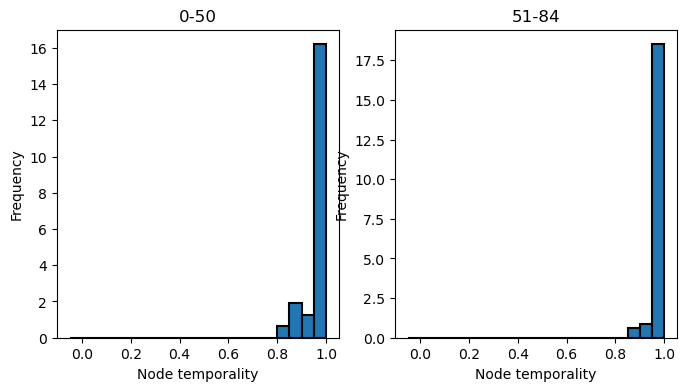

In [10]:
# individual temporalities of nodes
fig, axes = plt.subplots(1, 2, figsize=(8,4))

temporalities = pd.DataFrame(index = [species_index_T_non_aq[node] for node in graphs[idx].nodes()])
for i in range(0,len(graphs)-1):
    edg1 = set(graphs[i].edges)
    edg2 = set(graphs[i+1].edges)
    # edge temporality for each node: make a histogram of the number of edges that are present in both graphs for each node
    print(graphs[i].number_of_nodes())
    node_temporality = []
    for node in graphs[i].nodes():
        edg1_node = set(graphs[i].edges(node))
        edg2_node = set(graphs[i+1].edges(node))
        if len(edg1_node | edg2_node) != 0: 
            node_temporality.append(1 - len(edg1_node & edg2_node) / len(edg1_node | edg2_node))
        else:
            node_temporality.append(np.nan)

    temporalities[i] = [node_temporality[i] for i, node in enumerate(graphs[idx].nodes())]
    
    # plot the histogram of node_temporality
    ax = axes.flatten()[i]
    ax.hist(node_temporality, bins=np.arange(-0.05, 1.05, 0.05), density=True,
            edgecolor='black', linewidth=1.5, histtype='bar', zorder=3)
    ax.set_xlabel('Node temporality')
    ax.set_ylabel('Frequency')
    ax.set_title(f'{windows[i][0]}-{windows[i][1]}')        

    #network temporality
    temporality = 1. - (1. - len(edg1 & edg2) / len(edg1 | edg2))
    print(f'Temporality {windows[i][0]}-{windows[i][1]}: {temporality:.3f}')

# fig.savefig(f'./{results}/node_temporality_firewinkdows.png', dpi=300, bbox_inches='tight')

In [11]:
temporalities.sort_values(by=0)

0      1
Juglans         0.800000  1.000
Populus         0.800000  0.875
Alnus           0.857143  1.000
Chenopodiaceae  0.857143  0.900
Saxifragaceae   0.857143  1.000
...                  ...    ...
Castanea             NaN  1.000
Phillyrea            NaN  1.000
Vitis                NaN  1.000
Olea                 NaN  1.000
Polygonaceae         NaN  1.000

[70 rows x 2 columns]

## Eigenvector centrality

In [11]:
from scipy.sparse.csgraph import laplacian
from scipy.linalg import eig
centralities = pd.DataFrame(index=[species_index_T_non_aq[node] for node in graphs[0].nodes()])
for idx,G in enumerate(graphs):
    centralities[idx] = nx.eigenvector_centrality(G.reverse(), max_iter=1000).values()
    # pd.Series(centralities[i].values(), index=[species_index_T_non_aq[node] for node in G.nodes()]).sort_values(ascending=False).head(20)
centralities['sum'] = centralities.sum(axis=1)

In [12]:
centralities.sort_values(by='sum', ascending=False).to_csv(f'./{results}/centralities_firewindows.csv', sep='|', index=True)

### Correlation between eigenvector centralities across windows

<Axes: >

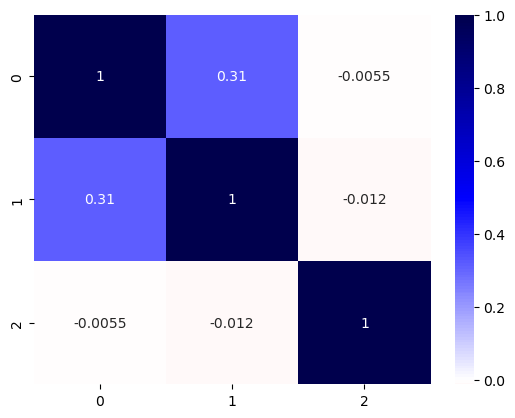

In [13]:
import seaborn as sns
corr_matrix = centralities.drop(columns=['sum']).corr(method='pearson')
sns.heatmap(corr_matrix, annot=True, cmap='seismic_r', center=0)


<Axes: >

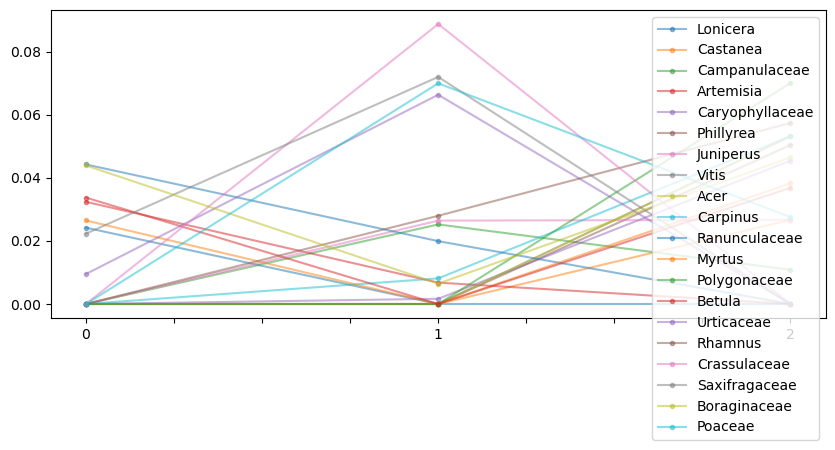

In [14]:
# plot the centralities over time
fig, ax = plt.subplots(figsize=(10, 4))

centralities.sort_values(by='sum').iloc[:20].drop(columns='sum').T.plot(ax=ax, marker='o', markersize=3, alpha=0.5)

## Distances between graphs (windows)

In [15]:
import networkx as nx
from collections import Counter
import hashlib

def weisfeiler_lehman_kernel(g1, g2, h=2):
    def initial_labeling(graph):
        return {node: str(graph.degree[node]) for node in graph.nodes()}
    
    def aggregate_labels(graph, labels):
        new_labels = {}
        for node in graph.nodes():
            neighbor_labels = sorted(labels[neighbor] for neighbor in graph.neighbors(node))
            long_label = labels[node] + "_" + "_".join(neighbor_labels)
            # Hash the label for uniqueness
            new_labels[node] = hashlib.md5(long_label.encode()).hexdigest()
        return new_labels

    def label_histogram(graph, h):
        labels = initial_labeling(graph)
        hist = Counter(labels.values())
        
        for i in range(h):
            labels = aggregate_labels(graph, labels)
            hist.update(labels.values())
        
        return hist

    hist1 = label_histogram(g1, h)
    hist2 = label_histogram(g2, h)

    # Compute kernel value as inner product (can also use other distances)
    kernel_value = sum(hist1[label] * hist2[label] for label in set(hist1) | set(hist2))
    return kernel_value

for idx in range(len(graphs)-1):
    similarity = weisfeiler_lehman_kernel(graphs[idx], graphs[idx+1], h=3)
    print(f"{windows[idx][0]}-{windows[idx][1]} to {windows[idx+1][0]}-{windows[idx+1][1]} similarity: {similarity:.3f}")

# similarity between similar random graphs
import random
def generate_random_graph(num_nodes, num_edges):
    G = nx.gnm_random_graph(num_nodes, num_edges, directed=True)
    return G

idx = 1
num_nodes = graphs[idx].number_of_nodes()
num_edges1 = graphs[idx].number_of_edges()
num_edges2 = graphs[idx+1].number_of_edges()
random_graphs1 = [generate_random_graph(num_nodes, num_edges1) for _ in range(10)]
random_graphs2 = [generate_random_graph(num_nodes, num_edges2) for _ in range(10)]
similarities = []

for idx in range(len(random_graphs1)):
    similarity = weisfeiler_lehman_kernel(random_graphs1[idx], random_graphs2[idx], h=3)
    similarities.append(similarity)
print(f"Average similarity between random graphs: {np.mean(similarities):.3f} ± {np.std(similarities):.3f}")

0-50 to 51-84 similarity: 662.000
51-84 to 85-140 similarity: 442.000
Average similarity between random graphs: 423.700 ± 22.428


### Basa de la mora

0-50 to 51-84:   662 / 447

51-84 to 85-140: 442 / 428

### GG

0-56 to 57-149 similarity:     2269 / 604

57-149 to 150-249 similarity:  1235 / 815

150-249 to 250-300 similarity:  549 / 499


In [16]:
import graph_tool.all as gt
import matplotlib.colors as mcolors

# Function that returns a generator for sequential colormap colors
def sequential_color_generator(cmap_name='tab10'):
    cmap = plt.get_cmap(cmap_name)
    index = 0
    while True:
        yield cmap(index % cmap.N)
        index += 1
def sequential_custom_generator():
    colors_list = ['forestgreen', 'royalblue', 'crimson', 'grey']
    index = 0
    while True:
        yield mcolors.to_rgb(colors_list[index % len(colors_list)])
        index += 1

# Create a graph-tool Graph object from the networkx graph
def SFDP_layout(network):
    g = gt.Graph(directed=True)
    weight = g.new_edge_property("double")
    vlist = {}
    for node in network.nodes:
        #add vertex with the same index as in networkx (example: '32848242')
        vlist[node] = g.add_vertex()
        
    for edge in network.edges:
        e = g.add_edge(vlist[edge[0]], vlist[edge[1]])
        if network.edges[edge]['weight'] >= 0:
            weight[e] = np.sqrt(network.edges[edge]['weight'])
        else:
            weight[e] = -np.sqrt(-network.edges[edge]['weight'])
    # get the maximum and minimum weights in the network
    max_weight_norm = max(np.abs(weight.a))

    # state of graph with signed edges, refer to https://forum.skewed.de/t/assortative-structure-in-signed-networks-ppblockstate-covariates/1407/2
    s_map = g.new_edge_property("int")    # For sign (0 or 1)
    y_map = g.new_edge_property("double") # For transformed magnitude
    y2_map = g.new_edge_property("double") # For transformed magnitude (arctanh)
    for e in g.edges():
        # normalize to (-1, 1) open range
        x = (weight[e] / max_weight_norm) * (1-1e-6)
        s_map[e] = 0 if x < 0 else 1
        y_map[e] = -np.log(1-abs(x))
        y2_map[e] = np.arctanh(x)

        
    state = gt.minimize_nested_blockmodel_dl(g, 
                    state_args=dict(
                                    recs=[weight],
                                    rec_types=["real-normal"]
                                    ),
                    )
    
    
    pos_gt = gt.sfdp_layout(g, groups=state.levels[0].b, gamma=0.05)
    print(state)
    pos = {}
    groups = {}
    generated_colors = {}
    color_gen = sequential_custom_generator()

    for key, value in vlist.items():
        pos[key] = pos_gt[value]
        groups[key] = state.levels[0].b[value]
    for group in set(groups.values()):
        # next(color_gen)
        generated_colors[group] = next(color_gen) # np.random.rand(3,)
        # for i in range(2):
        #     next(color_gen)
    colors = [generated_colors[groups[node]] for node in network.nodes]
    widths = [np.abs(network.edges[edge]['weight']) for edge in network.edges]
    return pos, colors, state, widths

In [17]:

def custom_seismic():
    # Colors: red -> gray -> blue
    colors = [
        (0.0, 'red'),
        (0.49, 'red'),
        (0.5, 'gray'),
        (0.51, 'blue'),
        (1.0, 'blue')
    ]
    return LinearSegmentedColormap.from_list('custom_seismic_gray', colors)

In [18]:
# for every edge in the graph, calculate the correlation between the abundances of the two species
def get_correlation_edges(graph, abundances):
    correlations_edges = []
    for edge in graph.edges:
        species1 = species_index_T[edge[0]]
        species2 = species_index_T[edge[1]]
        abundance1 = abundances[species1]['y']
        abundance2 = abundances[species2]['y']
        correlation = np.corrcoef(abundance1, abundance2)[0, 1]
        correlations_edges.append(correlation)
    correlation_edges = np.array(correlations_edges)
    return correlation_edges

def get_edge_colors_and_widths(graph : nx.DiGraph, abundances, p_values):

    weight_edges = get_correlation_edges(graph, abundances)
    # used for coloring the edges: blue if positive correlation, red if negative
    def get_edge_color(correlation):
        if correlation > 0: return 'blue'
        else: return 'red'
    edge_colors = [get_edge_color(correlation) for correlation in weight_edges]
    edge_colors = [custom_seismic()((correlation+1)/2) for correlation in weight_edges]
    edge_widths = []
    for edge in graph.edges:
        p_value = p_values[edge[0], edge[1]]
        # edge_widths.append(1 / (p_value + 0.01)**(0.25))
        edge_widths.append()
    edge_widths = np.array(edge_widths)
    return edge_colors, edge_widths

In [19]:
# add many graphs together as one
big_graph = nx.DiGraph()
for idx, graph in enumerate(graphs):
    big_graph = nx.compose(big_graph, graph)

In [25]:
pos, colors, state, widths = SFDP_layout(big_graph)

<NestedBlockState object, with base <BlockState object with 70 blocks (3 nonempty), degree-corrected, with 1 edge covariate, for graph <Graph object, directed, with 70 vertices and 546 edges, at 0x7fe359696ad0>, at 0x7fe3590025d0>, and 8 levels of sizes [(70, 3), (3, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1)] at 0x7fe357fa90f0>


<NestedBlockState object, with base <BlockState object with 62 blocks (2 nonempty), degree-corrected, with 1 edge covariate, for graph <Graph object, directed, with 62 vertices and 161 edges, at 0x7fe358071590>, at 0x7fe357dc3c50>, and 7 levels of sizes [(62, 2), (2, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1)] at 0x7fe357ddcc90>
<NestedBlockState object, with base <BlockState object with 61 blocks (2 nonempty), degree-corrected, with 1 edge covariate, for graph <Graph object, directed, with 61 vertices and 252 edges, at 0x7fe357db3750>, at 0x7fe357ba1450>, and 7 levels of sizes [(61, 2), (2, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1)] at 0x7fe357f6ad00>
<NestedBlockState object, with base <BlockState object with 68 blocks (2 nonempty), degree-corrected, with 1 edge covariate, for graph <Graph object, directed, with 68 vertices and 155 edges, at 0x7fe357dcfed0>, at 0x7fe37b8679d0>, and 8 levels of sizes [(68, 2), (2, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1)] at 0x7fe357e83890>

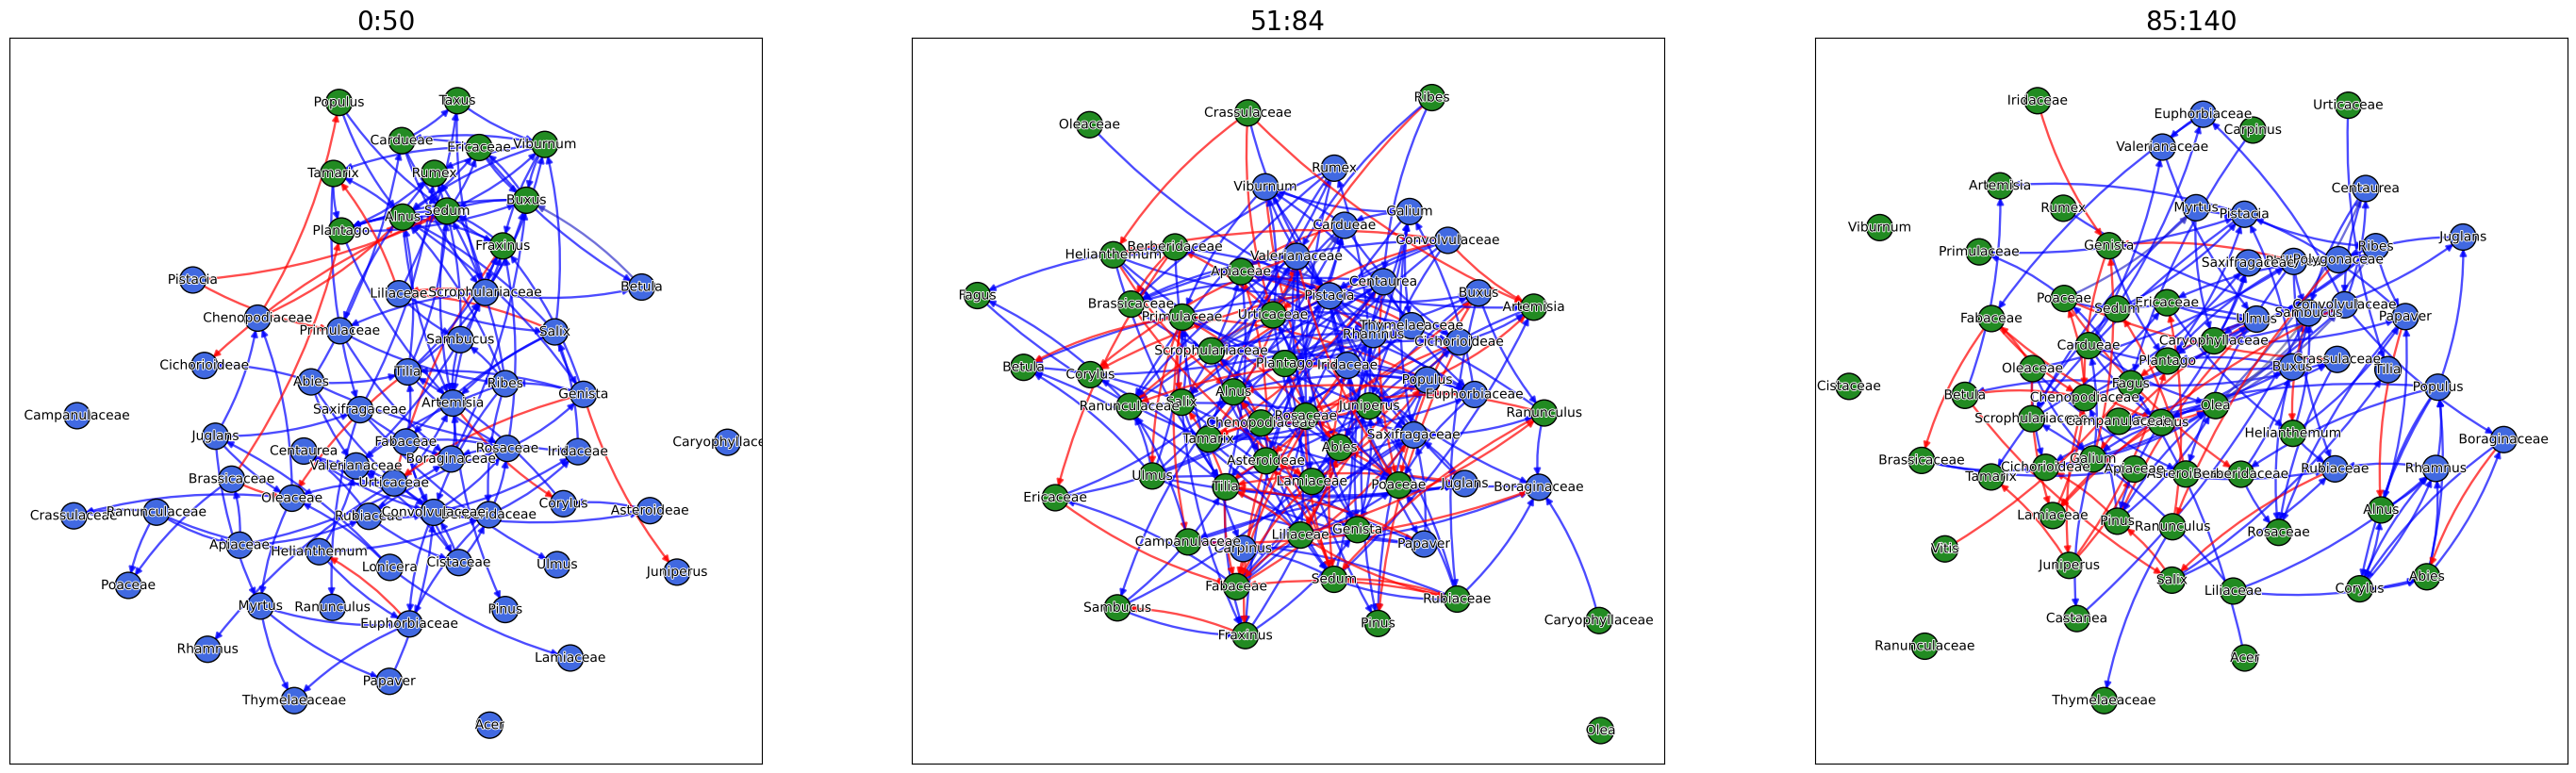

In [26]:
# select graph for visualization
fig, axes = plt.subplots(1, 3, figsize=(35,10))

for idx, graph_original in enumerate(graphs):
    (start, end) = windows[idx]
    graph = graph_original.copy()
    # remove nodes that have abundance of 0 in the current window
    nodes_to_delete = []
    for node in graph.nodes():
        if abundances[species_index_T_non_aq[node]]['y'][start:end].sum() == 0:
            nodes_to_delete.append(node)
    graph.remove_nodes_from(nodes_to_delete)
    # remove the nodes from species_index_T_non_aq
    species_index_T_non_aq_abundances = {k: v for k, v in species_index_T_non_aq.items() if k not in nodes_to_delete}
    
    ax = axes.flatten()[idx]
    ax.set_title(f'{start}:{end}', fontsize=20)
    granger_causality_p_values = granger_causalities_p_values[idx]


    pos, colors, state, edge_widths = SFDP_layout(graph)

    dict_abundances = {x:abundances[x]['y'].sum() for x in abundances.columns}
    sizes = [dict_abundances[species_index_T_non_aq[x]] for x in graph.nodes]

    # edge_colors, edge_widths = get_edge_colors_and_widths(graph, abundances, granger_causality_p_values)
    edge_colors = [granger_causalities[idx][u,v] for u, v in graph.edges()]
    edge_colors = [custom_seismic()((causality+1)/2) for causality in edge_colors]


    # size of the abundances
    # nx.draw_networkx_nodes(graph, ax = ax, node_size=[np.sqrt(size)*150 for size in sizes], node_color='grey', pos=pos, edgecolors='black', linewidths=1, alpha=1)
    # constant size and color of the group
    nx.draw_networkx_nodes(graph, ax = ax, node_size=400, node_color=colors, pos=pos, edgecolors='black', linewidths=1, alpha=1)

    nx.draw_networkx_edges(graph, ax = ax, alpha = 0.7, pos=pos, width=1.7, edge_color = edge_colors, connectionstyle='arc3,rad=0.1') #edge_color=edge_colors)

    texts = nx.draw_networkx_labels(graph, ax = ax, font_size=10, labels=species_index_T_non_aq_abundances,
                            pos=pos, font_color='black', font_family='sans-serif');

    for text in texts.values():
        text.set_path_effects([path_effects.Stroke(linewidth=1.3, foreground='white'),
                        path_effects.Normal()])

# fig.savefig(f'results_basa/gc_networks/fire_windows/gc_network_{start}-{end}_positioned.pdf', dpi=300, bbox_inches='tight')

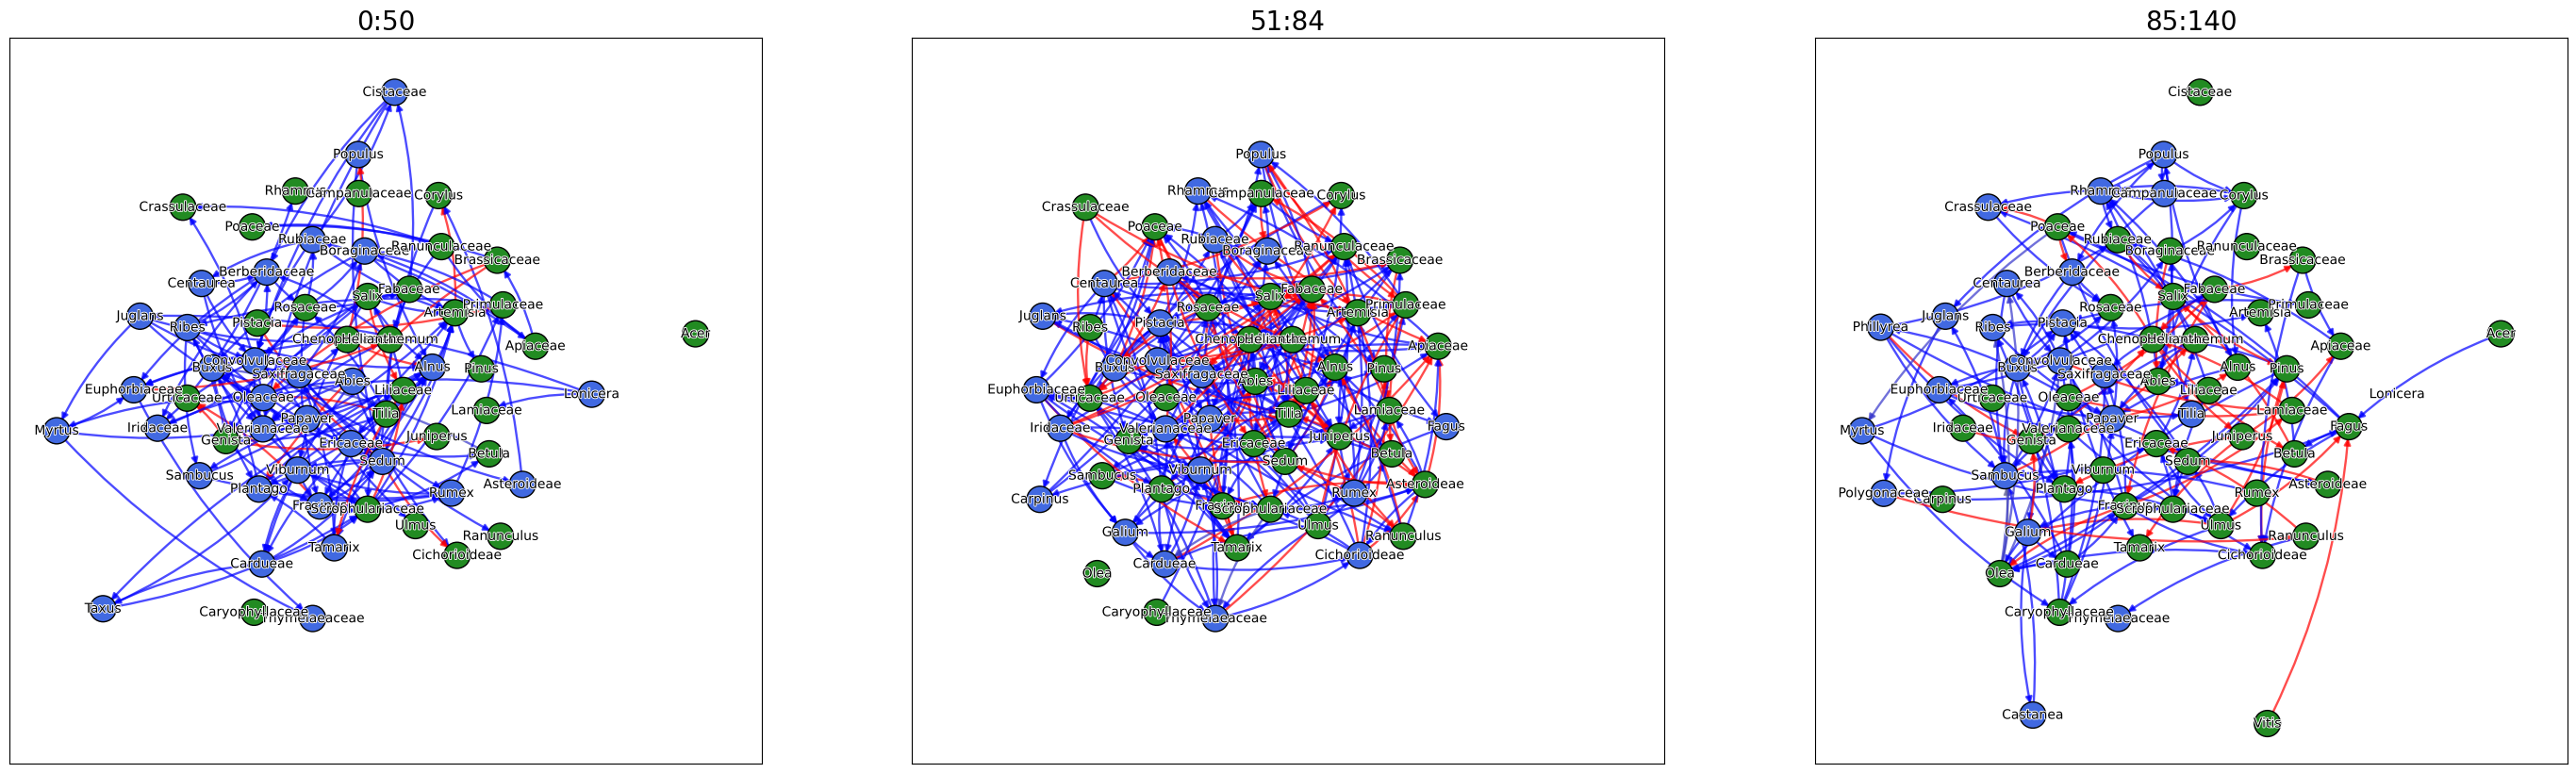

In [73]:
for idx in range(len(axes)):
    axes[idx].set_xlim(-3.1, 12.1)
    axes[idx].set_ylim(-4.1, 11.1)
fig

In [72]:
for text in axes[1].texts:
    if text.get_text() == "Cistaceae":
        text.remove()

In [29]:
fig.savefig(f'{results}/gc_networks/fire_windows/gc_networks.png', dpi=200, bbox_inches='tight')


In [75]:
# save fig to pickle
import pickle
with open(f'{results}/gc_networks/fire_windows/gc_networks.pickle', 'wb') as f:
    pickle.dump(fig, f)
# save the axes to pickle
with open(f'{results}/gc_networks/fire_windows/gc_networks_axes.pickle', 'wb') as f:
    pickle.dump(axes, f)

# Matrix representation

/tmp/ipykernel_9568/487283029.py:38: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(D, method='average')
/tmp/ipykernel_9568/487283029.py:39: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z_opt = optimal_leaf_ordering(Z, D)


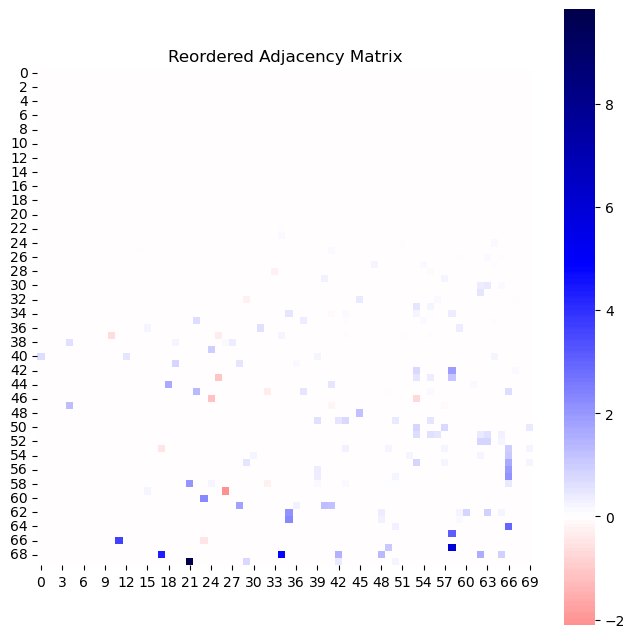

In [27]:
import networkx as nx
import numpy as np
from scipy.sparse.csgraph import laplacian
from scipy.linalg import eig

G = graphs[0]
A = nx.to_numpy_array(G)
# the original graph has the species as indices, so we create a new one
G = nx.from_numpy_array(A, create_using=nx.DiGraph)

# A = np.abs(A)

#---------------------------------------------------------------------------------
# Compute Laplacian and its eigenvectors
# L = laplacian(np.abs(A), normed=True)
# _, vecs = eig(L)
# # Get the Fiedler vector (2nd smallest eigenvalue)
# fiedler_vector = np.real(vecs[:, 1])
# # Reorder the adjacency matrix based on the Fiedler vector
# reordered_indices = np.argsort(fiedler_vector)
# reordered_A = A[reordered_indices][:, reordered_indices]
#---------------------------------------------------------------------------------
# degrees = dict(G.degree())
# # degrees with weights
# degrees = np.abs(A).sum(axis=0) + np.abs(A).sum(axis=1)
# degrees = {i: degrees[i] for i in range(len(degrees))}
# # Sort nodes by degree
# sorted_nodes = sorted(degrees, key=degrees.get, reverse=True)
# reordered_A = A[np.ix_(sorted_nodes, sorted_nodes)]
#---------------------------------------------------------------------------------

# Seriation (Optimal Leaf Ordering)

from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import optimal_leaf_ordering, linkage, leaves_list

D = squareform(pdist(A))
Z = linkage(D, method='average')
Z_opt = optimal_leaf_ordering(Z, D)
sorted_nodes = leaves_list(Z_opt)
reordered_A = A[np.ix_(sorted_nodes, sorted_nodes)]

#---------------------------------------------------------------------------------

# Reorder the adjacency matrix using the community structure (state variable)
# reordered_indices = pd.DataFrame({'i':np.arange(len(state.levels[0].b.a)), 'cluster':state.levels[0].b.a}).sort_values('cluster')['i'].values
# reordered_A = A[np.ix_(reordered_indices, reordered_indices)]

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
sns.heatmap(reordered_A, cmap='seismic_r', square=True, cbar=True, center=0)


plt.title("Reordered Adjacency Matrix")
plt.show()

<NestedBlockState object, with base <BlockState object with 70 blocks (2 nonempty), degree-corrected, with 1 edge covariate, for graph <Graph object, directed, with 70 vertices and 546 edges, at 0x7fe35dd536b0>, at 0x7fe357c35590>, and 8 levels of sizes [(70, 2), (2, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1)] at 0x7fe37b8ccc50>


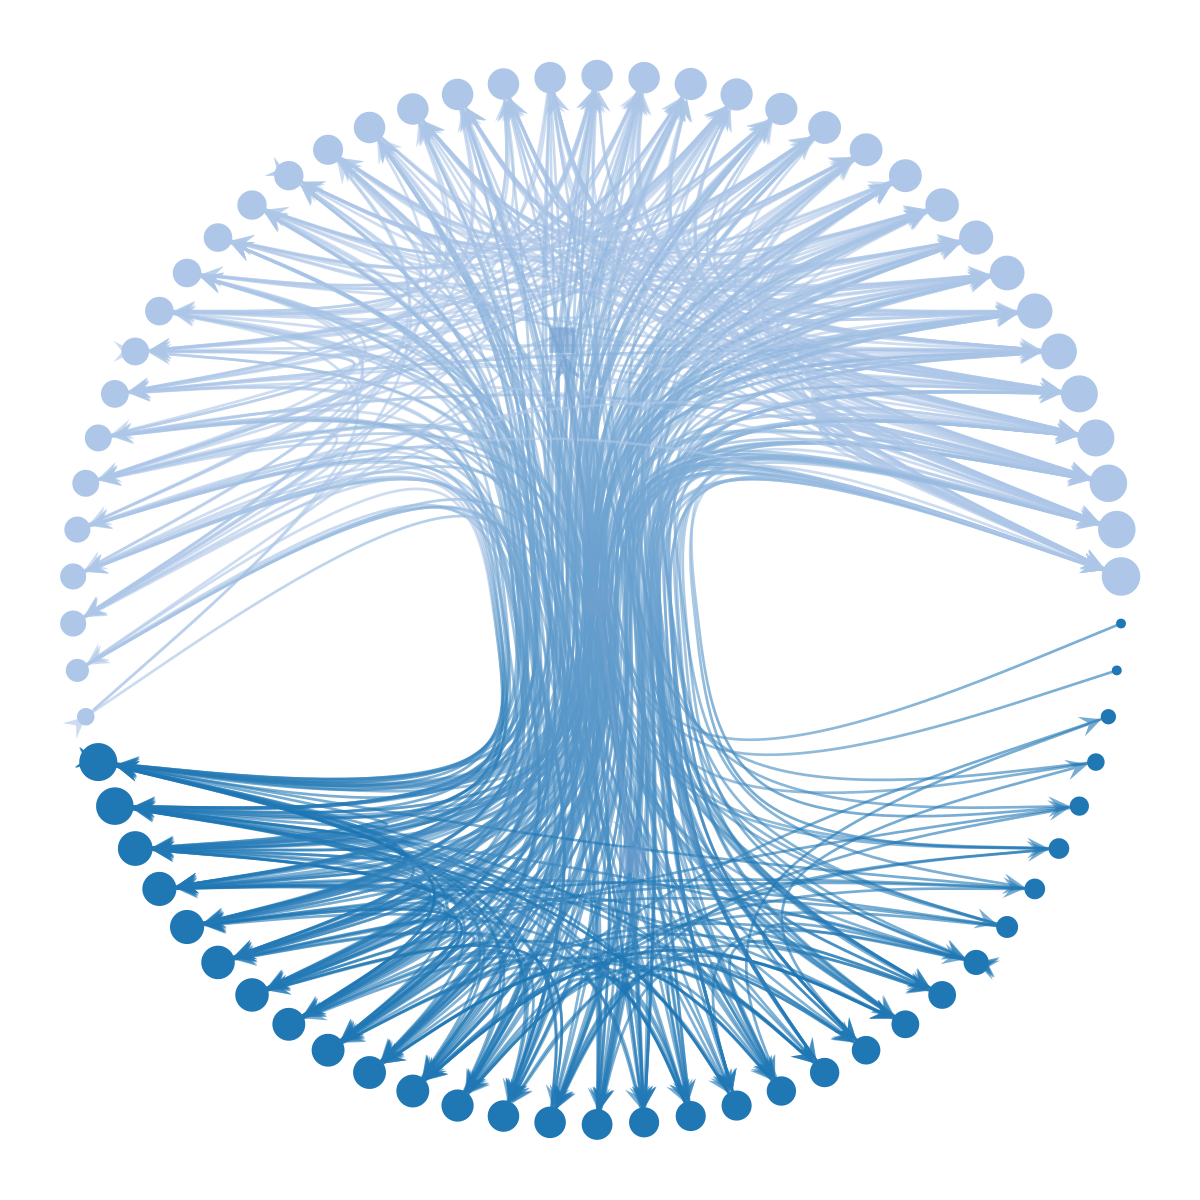

In [28]:
pos, colors, state, widths = SFDP_layout(big_graph)
big_pos, big_t, big_tpos = state.draw()

In [29]:
pos, colors, state, widths = SFDP_layout(graphs[0])

<NestedBlockState object, with base <BlockState object with 70 blocks (2 nonempty), degree-corrected, with 1 edge covariate, for graph <Graph object, directed, with 70 vertices and 161 edges, at 0x7fe37ad90f50>, at 0x7fe37b8679d0>, and 8 levels of sizes [(70, 2), (2, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1)] at 0x7fe383d0dc80>


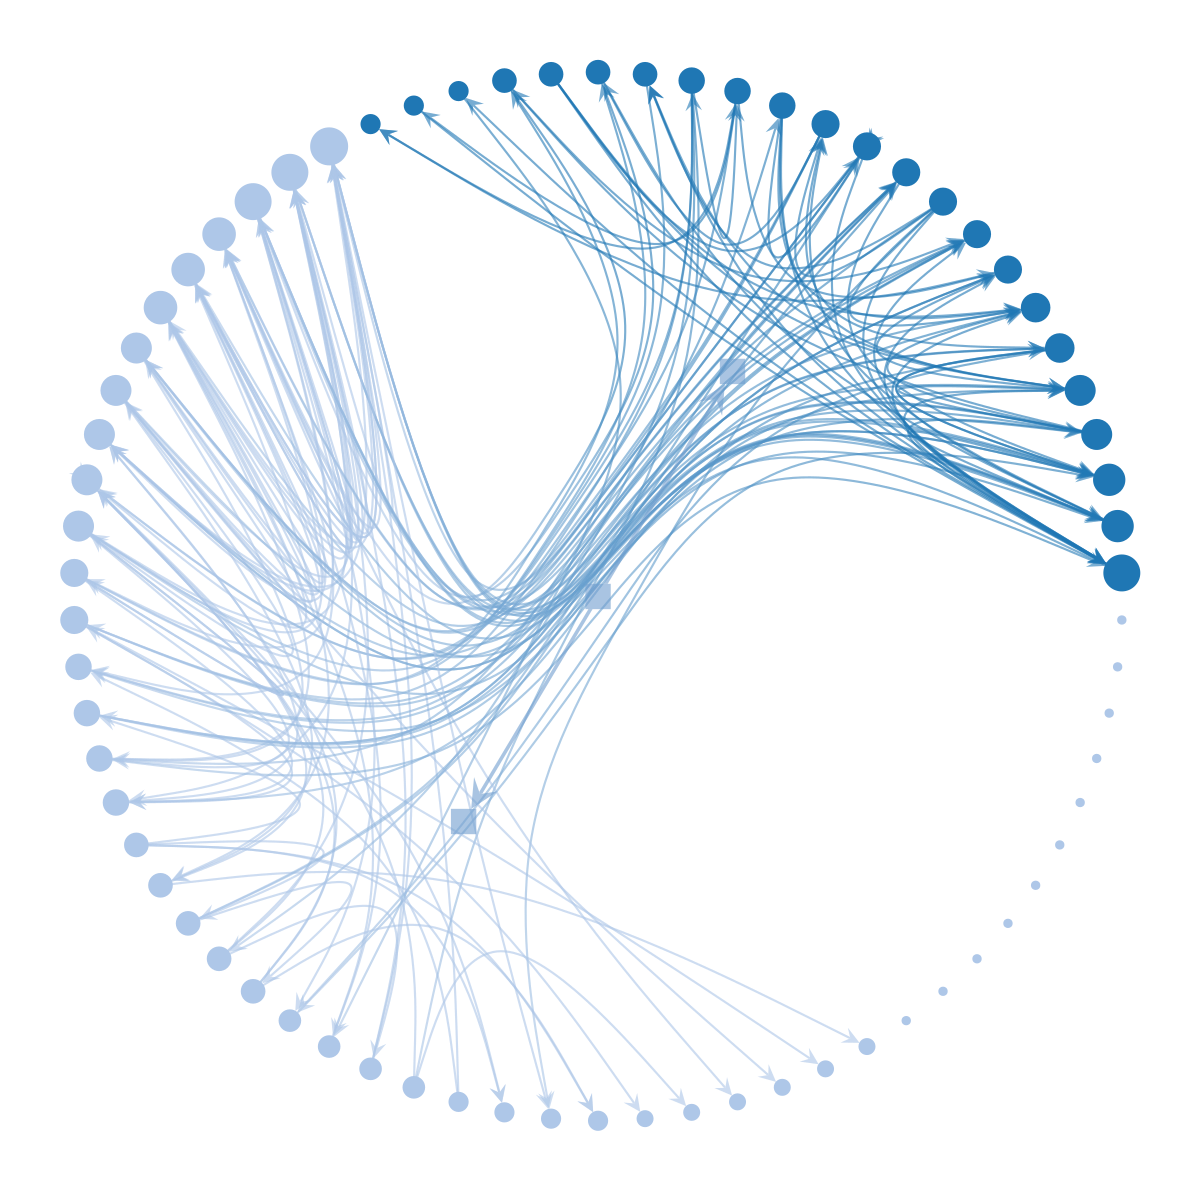

(<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7fe37ad90f50, at 0x7fe35dc24280>,
 <GraphView object, directed, with 73 vertices and 72 edges, edges filtered by <EdgePropertyMap object with value type 'bool', for Graph 0x7fe37ba85b30, at 0x7fe37ba05b00>, vertices filtered by <VertexPropertyMap object with value type 'bool', for Graph 0x7fe37ba85b30, at 0x7fe37ba05940>, at 0x7fe37ba85b30>,
 <VertexPropertyMap object with value type 'vector<double>', for Graph 0x7fe37ba85b30, at 0x7fe37ba04670>)

In [31]:
state.draw()

In [30]:
state.draw(pos = pos_g,
        ecmap=(matplotlib.cm.seismic, .6),
        edge_color=ecolor,
        # eorder=eweight_static,
        # edge_pen_width=gt.prop_to_size(eweight,
        #                                   1, 4,
        #                                   power=1,
        #                                   log=False),
        edge_gradient=[]);

NameError: name 'pos_g' is not defined

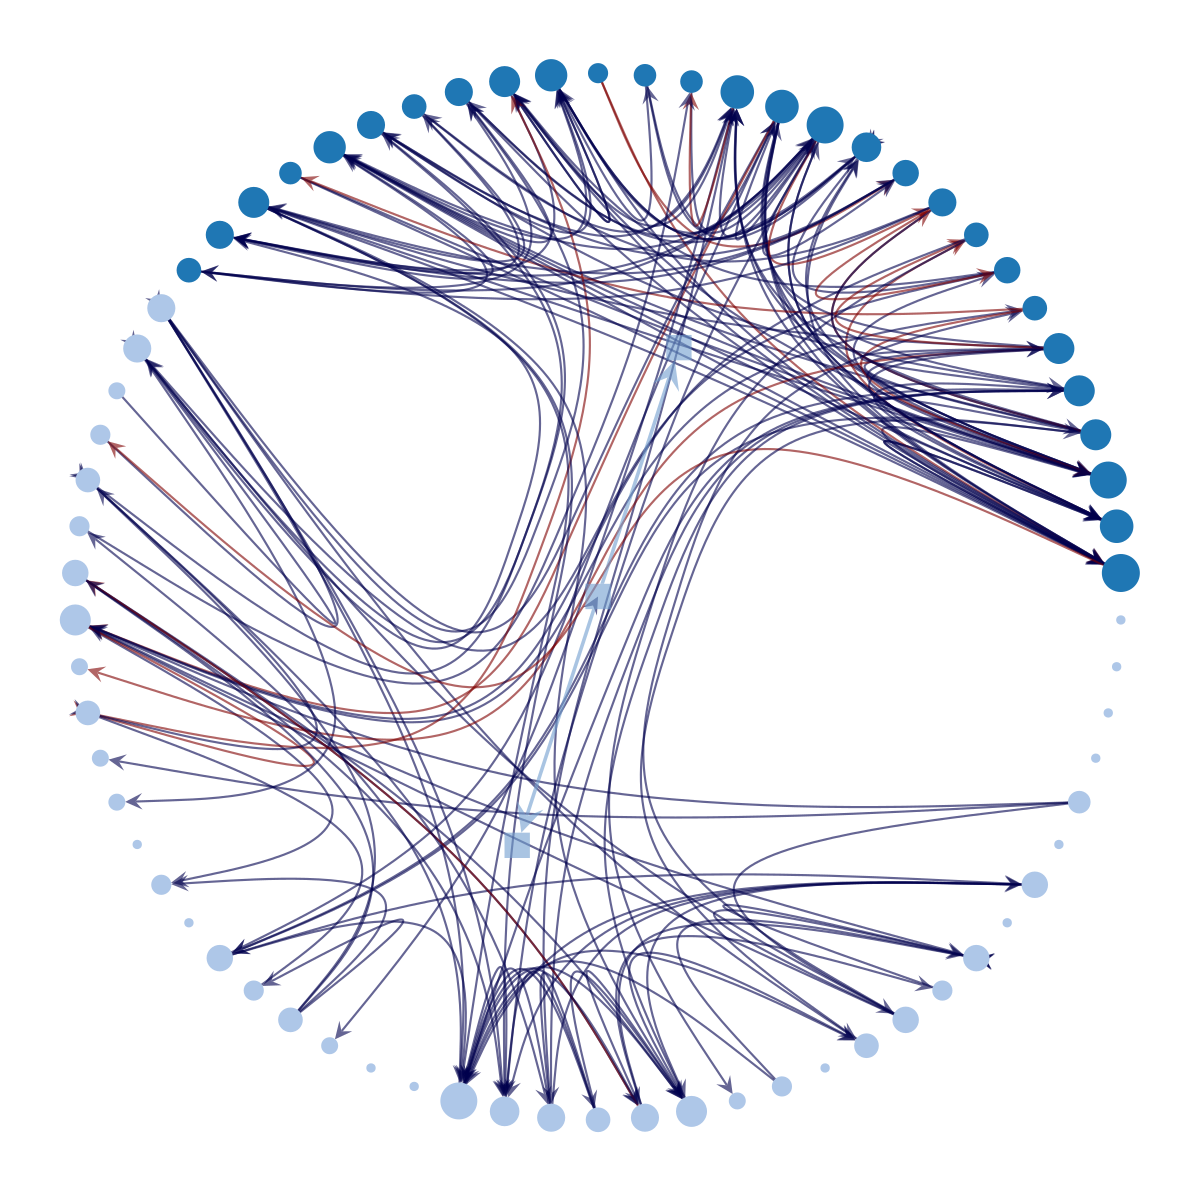

In [127]:

import graph_tool.all as gt
import matplotlib.cm
gt.seed_rng(1)

idx = 0
g = gt.Graph(directed=True, )

eweight = g.new_ep("double")
eweight_static = g.new_ep("double")

ecolor = g.new_ep("double")

vlist = {}
for node in graph.nodes:
    #add vertex with the same index as in networkx (example: '32848242')
    vlist[node] = g.add_vertex()
for edge in graphs[idx].edges:
    g.add_edge(vlist[edge[0]], vlist[edge[1]])
    eweight[g.edge(vlist[edge[0]], vlist[edge[1]])] = (granger_causalities[idx][edge[0], edge[1]])
    ecolor[g.edge(vlist[edge[0]], vlist[edge[1]])] = 0 if (granger_causalities[idx][edge[0], edge[1]] > 0) else 1


pos_g = g.new_vertex_property("vector<double>")
for v in g.vertices():
    pos_g[v] = big_pos[v]

state = gt.minimize_nested_blockmodel_dl(g)#, state_args=dict(recs=[eweight], rec_types=["real-normal"]))


# # ARGUMENTS FROM draw_hierarchy()
state.draw(pos = pos_g,
        ecmap=(matplotlib.cm.seismic, .6),
        edge_color=ecolor,
        # eorder=eweight_static,
        # edge_pen_width=gt.prop_to_size(eweight,
        #                                   1, 4,
        #                                   power=1,
        #                                   log=False),
        edge_gradient=[]);


In [120]:
state

<NestedBlockState object, with base <BlockState object with 70 blocks (2 nonempty), degree-corrected, with 1 edge covariate, for graph <Graph object, directed, with 70 vertices and 161 edges, at 0x7fee23937cf0>, at 0x7fee23984050>, and 8 levels of sizes [(70, 2), (2, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1)] at 0x7fee23d04cd0>

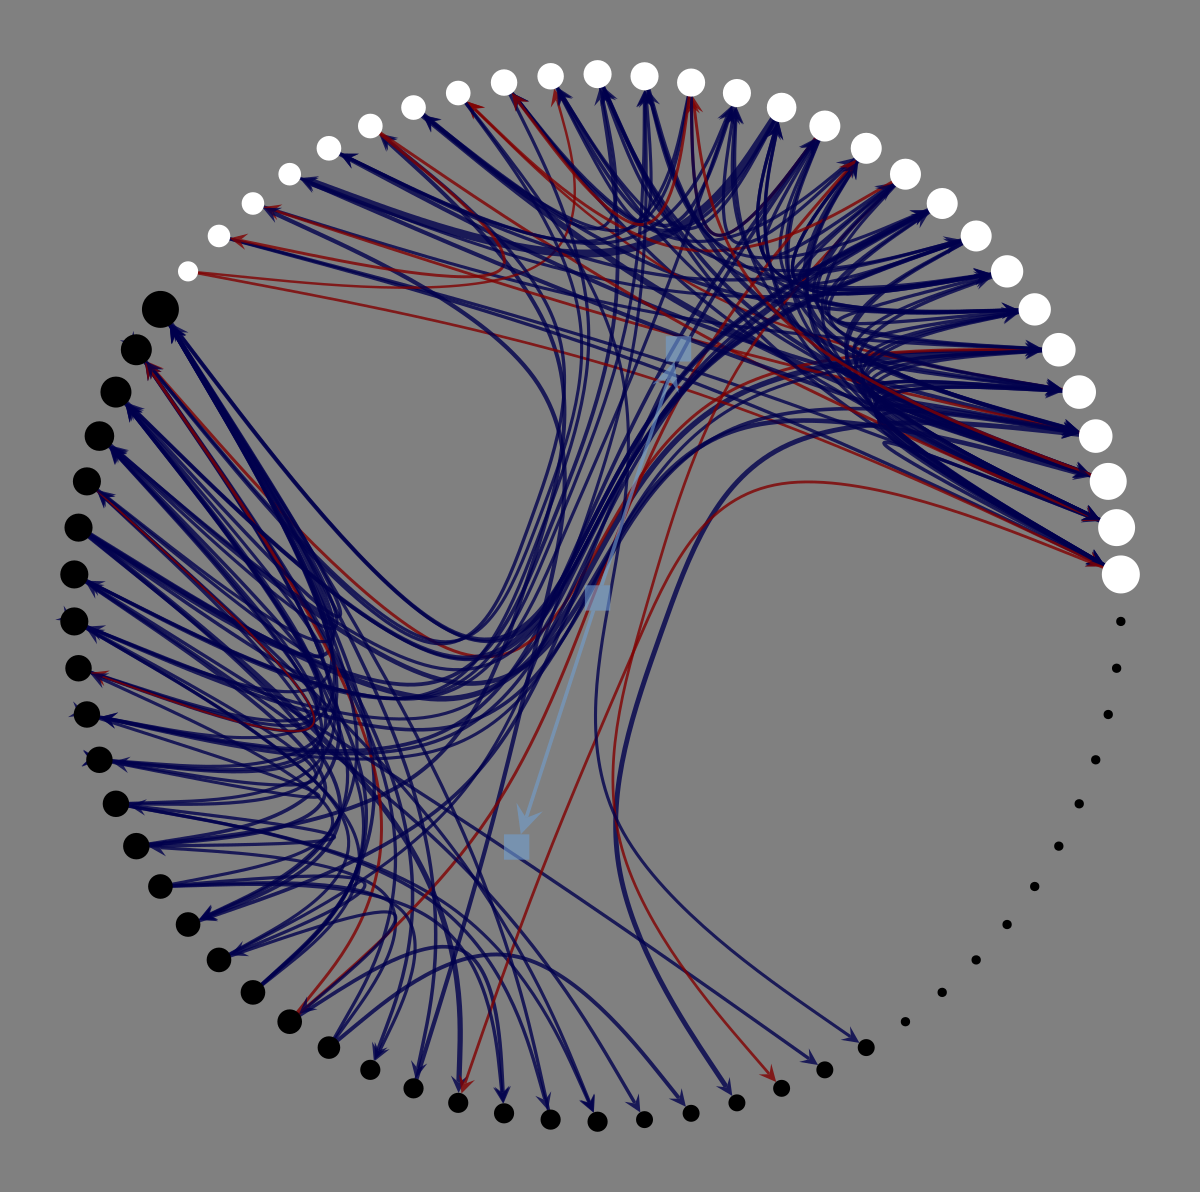

In [ ]:
gt.draw_hierarchy(state,# pos=big_pos,
                  ecmap=(matplotlib.cm.seismic, .8),
                  edge_color=ecolor,
                  edge_pen_width=gt.prop_to_size(eweight,
                                                  1, 4,
                                                  power=1,
                                                  log=False),
                    # remove hierarchy
                  hvprops=dict(alpha=1),
                  edge_gradient=[],
                  bg_color = 'grey');


In [72]:
from itertools import combinations

def is_balanced_triangle(edge_signs):
    product = edge_signs[0] * edge_signs[1] * edge_signs[2]
    return product > 0  # +1 (balanced) if positive product

def calculate_balance(graph):
    triangles = [nodes for nodes in combinations(graph.nodes, 3)
                 if graph.has_edge(nodes[0], nodes[1]) and
                    graph.has_edge(nodes[0], nodes[2]) and
                    graph.has_edge(nodes[1], nodes[2])]
    balanced_count = 0

    for u, v, w in triangles:
        edge_signs = [
            graph[u][v]['sign'],
            graph[u][w]['sign'],
            graph[v][w]['sign']
        ]
        if is_balanced_triangle(edge_signs):
            balanced_count += 1

    total_triangles = len(triangles)
    if total_triangles == 0:
        return 1.0, 0  # trivially balanced if no triangles

    return (balanced_count/total_triangles,total_triangles)

for graph in graphs:
    for u, v in graph.edges():
        # Assign a sign to each edge based on the causality value
        sign = 1 if granger_causalities[idx][u, v] > 0 else -1
        graph[u][v]['sign'] = sign

    balance, triangles = calculate_balance(graph)
    print(f"Balance ratio: {balance:.2f}, Total triangles: {triangles}")


Balance ratio: 0.83, Total triangles: 6
Balance ratio: 0.42, Total triangles: 26
Balance ratio: 0.36, Total triangles: 11
Balance ratio: 0.00, Total triangles: 69
